In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data                # Features: measurements of the flowers
y = iris.target              # Labels: species of the flowers

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create and train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


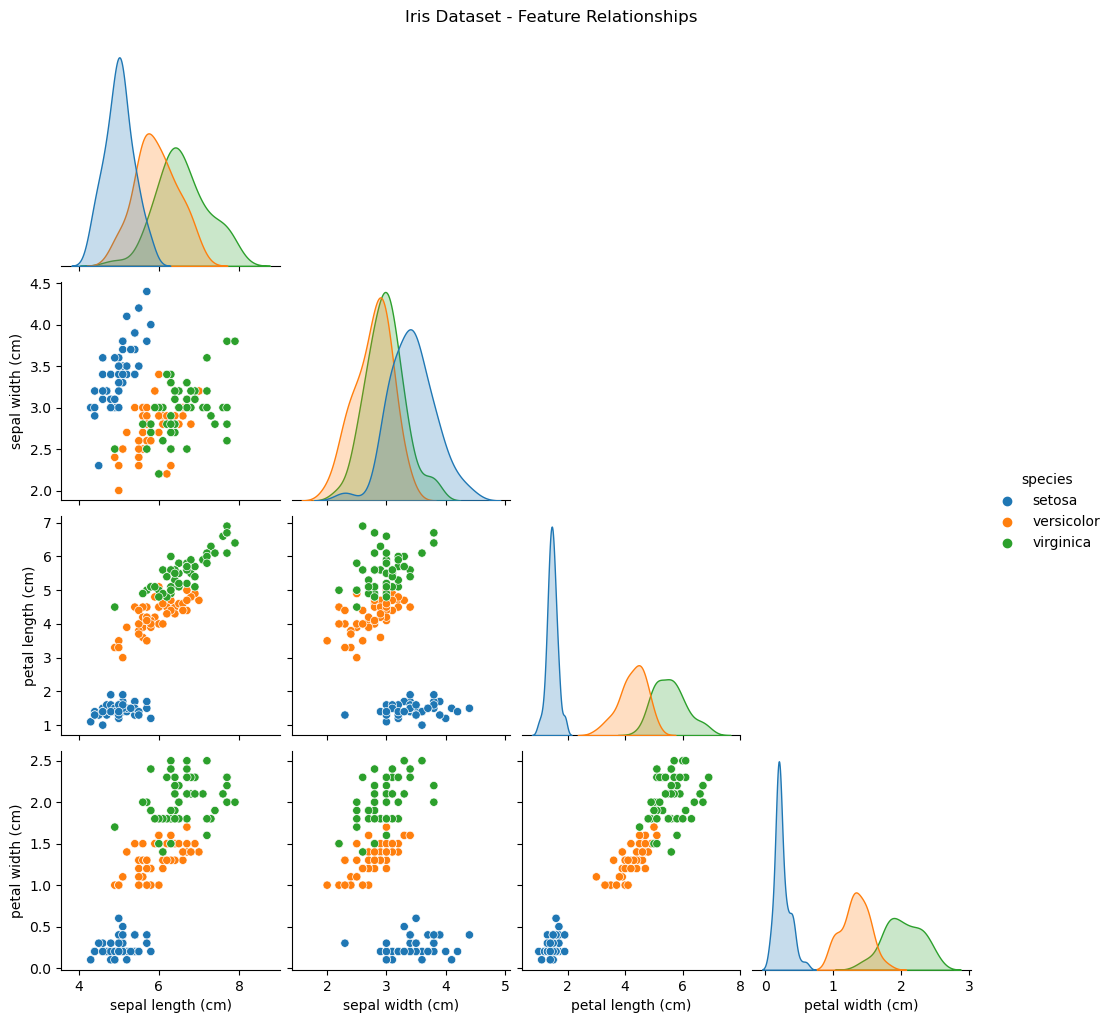

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target numbers to species names
df['species'] = df['species'].map(dict(zip(range(3), iris.target_names)))

# Pairplot using seaborn
sns.pairplot(df, hue="species", corner=True)
plt.suptitle("Iris Dataset - Feature Relationships", y=1.02)
plt.show()

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "SVM (linear)": SVC(kernel="linear")
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

Decision Tree Accuracy: 1.00
KNN (k=3) Accuracy: 1.00
SVM (linear) Accuracy: 1.00



=== Decision Tree ===
Accuracy: 1.00


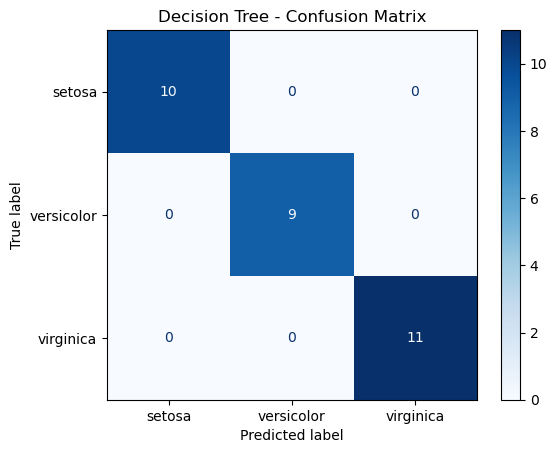

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


=== KNN (k=3) ===
Accuracy: 1.00


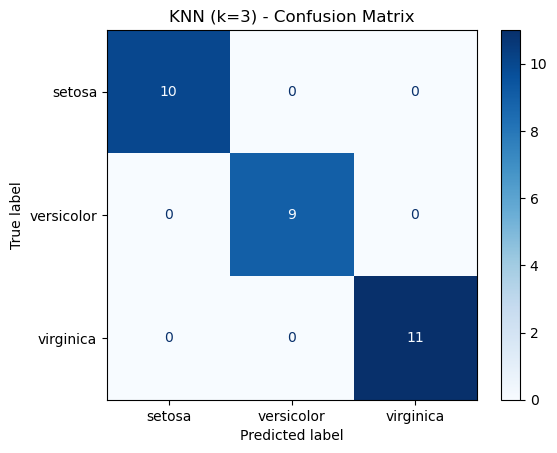

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


=== SVM (linear) ===
Accuracy: 1.00


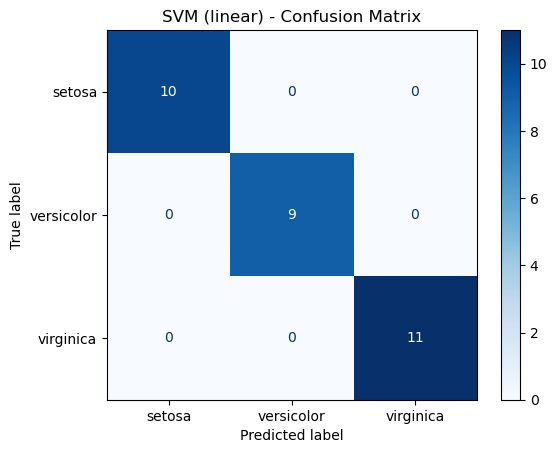

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Use the same models dictionary and data split as πριν
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n=== {name} ===")
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    
    # Confusion Matrix (visual + raw)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # Precision, Recall, F1, Support
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameter grid
param_grid = {
    'C': [0.1, 1, 10],               # Regularization strength
    'kernel': ['linear', 'rbf'],    # Type of kernel
    'gamma': ['scale', 'auto']      # For non-linear kernels like 'rbf'
}

# Create the model
svc = SVC()

# Setup GridSearchCV
grid_search = GridSearchCV(
    svc, param_grid, cv=5, scoring='accuracy'
)

# Fit it to the training data
grid_search.fit(X_train, y_train)

# Show the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Score: 0.9583333333333334
Test Accuracy with Best Model: 1.0


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit to training data
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", knn.score(X_test, y_test))


Accuracy: 1.0


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Set up the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 11))  # δοκίμασε K από 1 έως 10
}

# Create the KNN model
knn = KNeighborsClassifier()

# Grid search with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5)

# Fit the model on training data
grid.fit(X_train, y_train)

# Show best K and best score
print("Best K:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

# Evaluate on test set
best_knn = grid.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print("Test Accuracy with Best K:", test_accuracy)

Best K: {'n_neighbors': 3}
Best Cross-Validated Score: 0.9583333333333334
Test Accuracy with Best K: 1.0


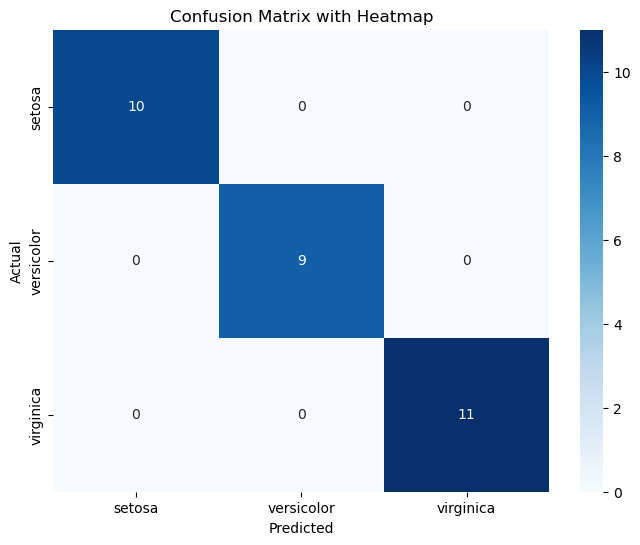

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict with the best model (SVM)
y_pred = best_knn.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix with Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()